# Portfolio Optimization and Modern Portfolio Theory (MPT)

Portfolio optimization is an important area of quantitative finance. It was introduced by Harry Markowitz in 1952 in his paper ‘Portfolio Selection’ and was further developed into a whole research field. The main goal of portfolio optimization in its simplest form is creating portfolios that maximize (expected) returns at a given level of risk.

Suppose we have N assets with expected return $\mu$ and covariance matrix $\Sigma$. We want to construct a portfolio by choosing portfolio weights $w$.

$$
\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_n \end{bmatrix} \quad
\Sigma = \begin{bmatrix} 
           \sigma_{11} & \dots & \sigma_{1n} \\
           \vdots & \ddots & \vdots \\
           \sigma_{n1} & \dots & \sigma_{nn}
         \end{bmatrix} \quad
w = \begin{bmatrix} w_1 \\ \vdots \\ w_n \end{bmatrix}
$$

The expected return and variance of the resulting portfolio can be calculated as follows:

$$
\mu_{pf} = w^{T} \mu  \quad
\sigma^2_{pf} = w^T \Sigma w
$$

Optimization problem
* minimize risk(portfolio variance)
* maximize portfolio return for a given leven of risk(variance):

$$
min(\sigma^2_{pf})  \quad s.t. \quad \sum_i{w_i} = 1 \\
max(\mu{pf}) \quad s.t. \quad \sum_i{w_i} = 1 \quad and \quad \sigma^2_{pf} = c
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Download and get Daily Returns
data_dir = '../data'
aapl = pd.read_csv(f'{data_dir}/AAPL_CLOSE.csv',index_col='Date',parse_dates=True)
cisco = pd.read_csv(f'{data_dir}/CISCO_CLOSE.csv',index_col='Date',parse_dates=True)
ibm = pd.read_csv(f'{data_dir}/IBM_CLOSE.csv',index_col='Date',parse_dates=True)
amzn = pd.read_csv(f'{data_dir}/AMZN_CLOSE.csv',index_col='Date',parse_dates=True)

stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [7]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [8]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


<Axes: xlabel='Date'>

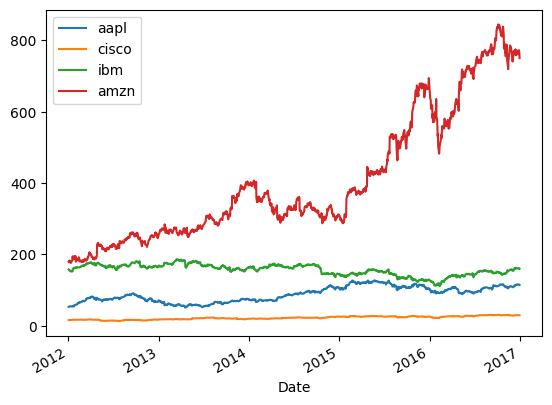

In [9]:
stocks.plot()

<Axes: xlabel='Date'>

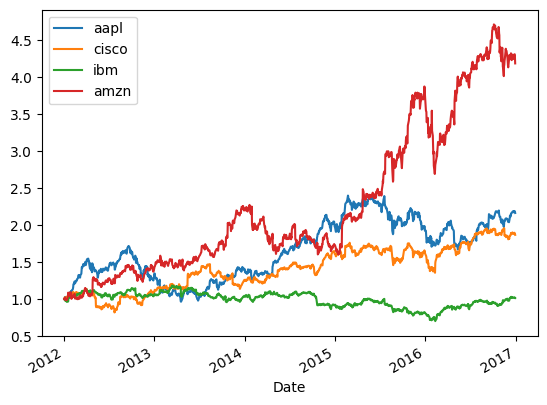

In [10]:
stock_normed = stocks / stocks.iloc[0]
stock_normed.plot()

## Log Returns vs Perc Returns

In [14]:
pct_ret = stocks.pct_change(1)
pct_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


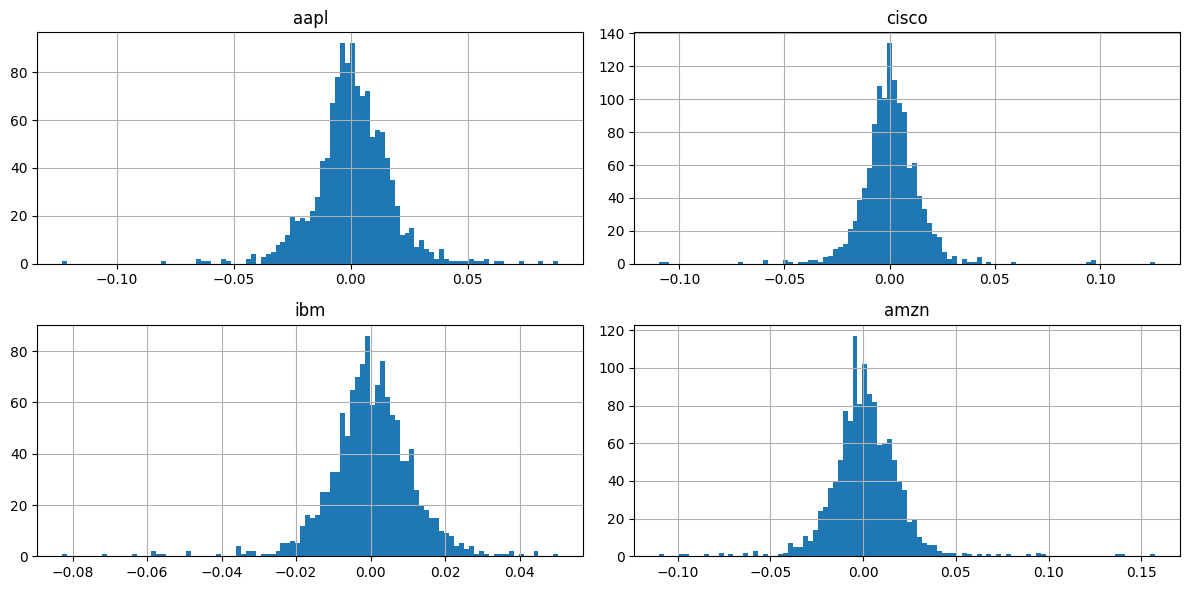

In [16]:
pct_ret.hist(bins=100, figsize=(12, 6))
plt.tight_layout()

In [12]:
log_ret = np.log(stocks / stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


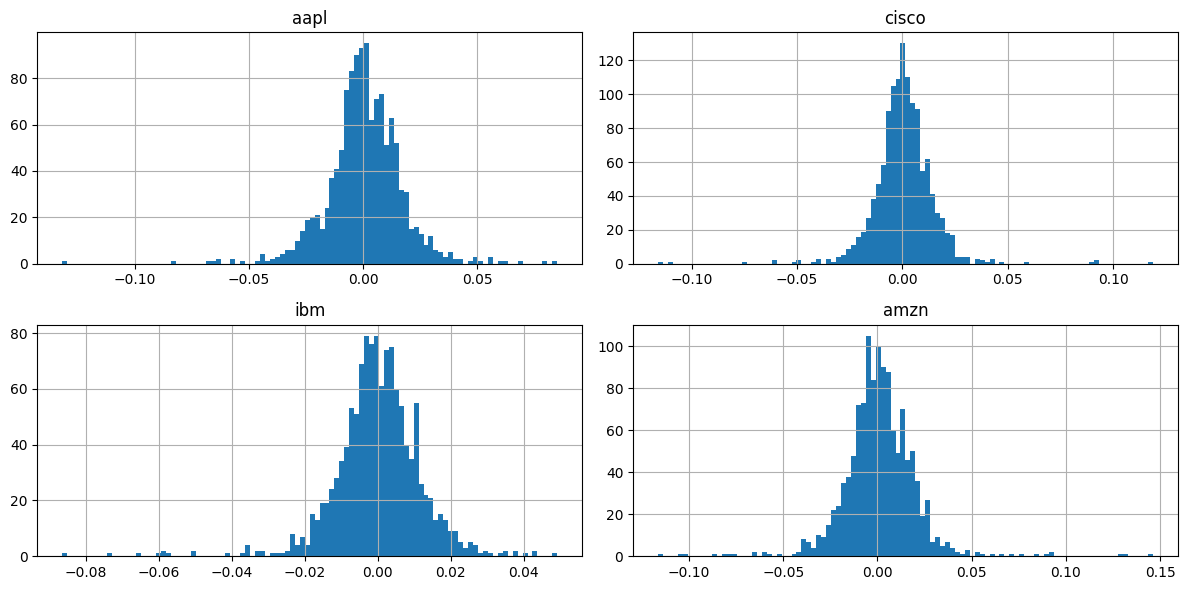

In [15]:
log_ret.hist(bins=100, figsize=(12, 6))
plt.tight_layout()

In [17]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [18]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [ ]:
log_ret.cov()
log_ret.cov() * 252

## Simulation once

In [21]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)

# Expected Volatility
print('Expected Volatility')
# annualized sd
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
0.1559927204963251
Expected Volatility
0.18502649565908932
Sharpe Ratio
0.8430831483926559


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf
from tqdm import tqdm

In [29]:
stocks = ['AAPL', 'BRK-B', 'MMM', 'GLD']
prices = pd.DataFrame(columns=stocks)
for stock in stocks:
    tmpdf = yf.download(stock, start='2018-01-01', end='2023-12-31')
    tmpdf.to_csv(f"{stock}.csv")
    prices[stock] = tmpdf['Adj Close']
prices.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,BRK-B,MMM,GLD
Date,,,,
2018-01-02,40.722881,197.220001,187.720261,125.150002
2018-01-03,40.715778,199.789993,187.712341,124.820000
2018-01-04,40.904911,200.690002,190.165955,125.459999
2018-01-05,41.370625,201.419998,191.647736,125.330002
2018-01-08,41.216965,202.740005,191.026306,125.309998


In [4]:
prices.isna().sum().sum()

0

In [6]:
returns = prices.pct_change().dropna()

In [7]:
returns.corr()

,AAPL,BRK-B,MMM,GLD
AAPL,1.000000,0.583121,0.467889,0.082735
BRK-B,0.583121,1.000000,0.636419,0.015374
MMM,0.467889,0.636419,1.000000,0.043471
GLD,0.082735,0.015374,0.043471,1.000000


In [8]:
returns.cov()

,AAPL,BRK-B,MMM,GLD
AAPL,0.000445,0.000180,0.000169,0.000016
BRK-B,0.000180,0.000214,0.000159,0.000002
MMM,0.000169,0.000159,0.000292,0.000007
GLD,0.000016,0.000002,0.000007,0.000082


In [9]:
returns.mean()

AAPL     0.001141
BRK-B    0.000464
MMM     -0.000256
GLD      0.000283
dtype: float64

In [10]:
portfolios = pd.DataFrame(columns=list(stocks)+['return', 'sd'])

# mc
for i in range(10000):
    np.random.seed(i)
    weights = np.random.uniform(size=len(stocks)) # generate random weights
    weights /= weights.sum() # make weights sum to 1
    ret = weights.T @ returns.mean() * 252 # annualized return
    sd = np.sqrt(weights.T @ returns.cov() @ weights * 252) # annualized sd
    portfolios.loc[i] = list(weights) + [ret, sd]

In [17]:
portfolios.head()

,AAPL,BRK-B,MMM,GLD,return,sd
0,0.227568,0.296556,0.249938,0.225938,0.100073,0.183789
1,0.289640,0.500297,0.000079,0.209983,0.156695,0.193818
2,0.301329,0.017918,0.379888,0.300864,0.085672,0.185935
3,0.267290,0.343648,0.141169,0.247893,0.125569,0.182439
4,0.302030,0.170916,0.303797,0.223257,0.103131,0.192570


Text(0, 0.5, 'Return')

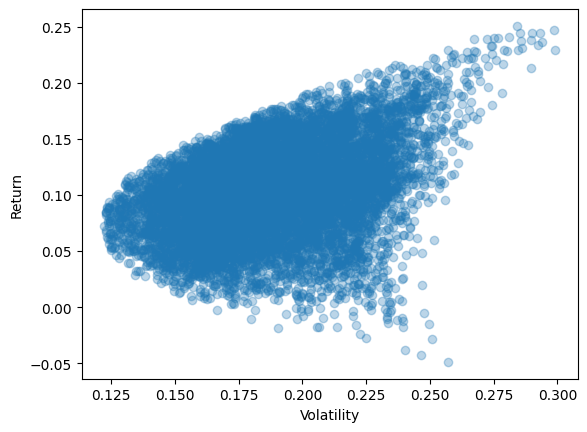

In [11]:
plt.scatter(portfolios['sd'], portfolios['return'], alpha=0.3)
plt.xlabel('Volatility')
plt.ylabel('Return')

In [12]:
# we care about the min sd
portfolios[portfolios['sd']==portfolios['sd'].min()]

,AAPL,BRK-B,MMM,GLD,return,sd
6590,0.001252,0.222712,0.071049,0.704987,0.072045,0.122199


In [13]:
portfolios[portfolios['sd']<=0.2]['return'].idxmax()

5713

In [14]:
portfolios.loc[5713]

AAPL      0.532621
BRK-B     0.044420
MMM       0.013931
GLD       0.409028
return    0.186546
sd        0.199938
Name: 5713, dtype: float64

In [16]:
# calculate returns and volatilities of individual assets
cumrets = (returns + 1).cumprod()
total_returns = (cumrets.iloc[-1] - cumrets.iloc[0])/cumrets.iloc[0]
rets = (1+total_returns)**(252/len(returns)) - 1
stds = np.sqrt(252)*returns.std()

/var/folders/zk/83r7bdpd2g11psvjbywlbxsr0000gn/T/ipykernel_4421/305871536.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(s, [stds[i], rets[i]])


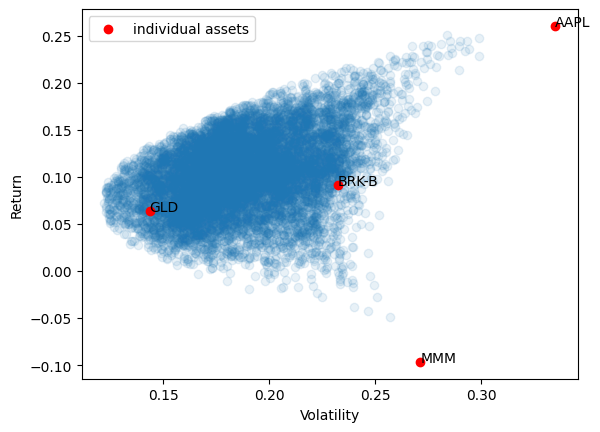

In [17]:
plt.scatter(portfolios['sd'], portfolios['return'], alpha=0.1)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(stds, rets, color='r', label='individual assets')
for i,s in enumerate(stocks):
    plt.annotate(s, [stds[i], rets[i]])
plt.legend()

## Optimization problem

using scipy.optimize

## Trading strategy

For 20% volatility the maximum portfolio return that we can achieve is 19%.

In [22]:
from scipy.optimize import minimize

# function to minimize
def volatility(weights, returns):
    return np.sqrt(weights.T @ returns.cov() @ weights * 252)

def negative_annual_return(weights, returns):
    ret = weights.T @ returns.mean() * 252
    return -ret    

In [23]:
# calculate weekly prices
prices_w = prices.resample('1W').last()
returns_w = prices_w.pct_change().dropna()

positions = pd.DataFrame(index=prices_w.loc['2019-01-01':].index, 
                         columns=prices_w.columns)

target_vol = 0.2
constraints = ({'type':'eq', 'fun': lambda x: volatility(x,returns_tmp)-target_vol}, 
               {'type':'eq', 'fun': lambda x: np.sum(x)-1})
bounds=[[0,1]]*len(stocks)
x0 = np.ones(len(stocks)) / len(stocks)

for t in tqdm(returns_w.loc['2019-01-01':].index):
    prices_tmp = prices.loc[:t].iloc[-252:]
    returns_tmp = prices_tmp.pct_change().dropna()
    
    res = minimize(negative_annual_return, x0, args=(returns_tmp), 
               bounds=bounds, constraints=constraints)
    positions.loc[t] = res.x

cumret_mpt = (1 + (positions.shift() * returns_w.loc['2019-01-01':]).sum(axis=1)).cumprod()
cumret_eqw = (1 + returns_w.loc['2019-01-01':].sum(axis=1)/returns_w.shape[1]).cumprod()

  0%|          | 0/209 [00:00<?, ?it/s]

100%|██████████| 209/209 [00:08<00:00, 23.95it/s]


In [24]:
positions

,AAPL,BRK-B,MMM,GLD
Date,,,,
2019-01-06,0.0,0.861878,0.0,0.138122
2019-01-13,0.0,0.863173,0.0,0.136827
2019-01-20,0.0,0.861754,0.0,0.138246
2019-01-27,0.641779,0.0,0.0,0.358221
2019-02-03,0.626163,0.0,0.0,0.373837
...,...,...,...,...
2022-12-04,0.0,0.869108,0.0,0.130892
2022-12-11,0.0,0.869086,0.0,0.130914
2022-12-18,0.0,0.870272,0.0,0.129728


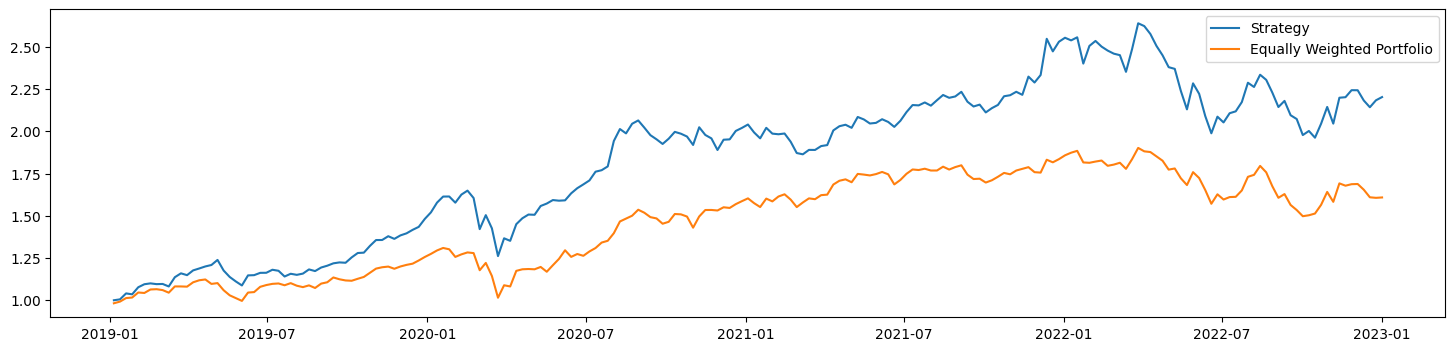

In [25]:
plt.figure(figsize=(18,4))
plt.plot(cumret_mpt, label='Strategy')
plt.plot(cumret_eqw, label='Equally Weighted Portfolio')
plt.legend()

In [27]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret.iloc[-1] - cumret.iloc[0])/cumret.iloc[0]
    apr = (1+total_return)**(52/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    rets.iloc[0] = 0
    sharpe = np.sqrt(52) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

results_df = pd.DataFrame(columns=['Total return', 'APR', 'Sharpe', 'Max DD', 'Max DD Duration'])
results_df.loc['Strategy'] = calculate_metrics(cumret_mpt)
results_df.loc['Equally Weighted'] = calculate_metrics(cumret_eqw)
results_df

/var/folders/zk/83r7bdpd2g11psvjbywlbxsr0000gn/T/ipykernel_4421/2392482064.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
/var/folders/zk/83r7bdpd2g11psvjbywlbxsr0000gn/T/ipykernel_4421/2392482064.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  drawdown[t]=cumret[t]/highwatermark[t]-1
/var/folders/zk/83r7bdpd2g11psvjbywlbxsr0000gn/T/ipykernel_4421/2392482064.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

,Total return,APR,Sharpe,Max DD,Max DD Duration
Strategy,1.202321,0.217054,1.031954,-0.256560,40.0
Equally Weighted,0.637634,0.130571,0.791562,-0.224866,40.0


In [28]:

np.sqrt(52)*cumret_mpt.pct_change().std()

0.21371927457511594

# References

* https://github.com/akashprem12/Portfolio-Optimisation-using-Monte-Carlo-Simulation/blob/master/Portfolio%20Optimisation%20using%20Monte%20Carlo%20Simulation.ipynb
* https://medium.com/@financialnoob/portfolio-optimization-with-weighted-mean-and-covariance-estimators-de6dda2cab3d
* https://medium.com/@financialnoob/introduction-to-portfolio-optimization-and-modern-portfolio-theory-101f663829c4
* https://github.com/financialnoob/portfolio_optimization/blob/fd98374445eb8ba060c2da7a496f025c6cc746d7/1.intro_to_mpt.ipynb
* https://www.countbayesie.com/blog/2022/8/7/modern-portfolio-theory-and-optimization-with-jax